# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [4]:
df['Credit_History'].sum()

475.0

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

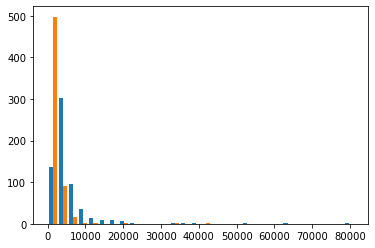

In [5]:
plt.hist(x=df[['ApplicantIncome', 'CoapplicantIncome']], bins=30)
plt.show()

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [6]:
cols_cat = df.dtypes[(df.dtypes == object) & (df.dtypes.index != 'Loan_ID')].index.tolist()

for col in cols_cat:
    print(f'{df.groupby(col).size().reset_index(name="Counts")}\n')
# df.groupby(cols_cat).size().reset_index(name='Counts')

   Gender  Counts
0  Female     112
1    Male     489

  Married  Counts
0      No     213
1     Yes     398

  Dependents  Counts
0          0     345
1          1     102
2          2     101
3         3+      51

      Education  Counts
0      Graduate     480
1  Not Graduate     134

  Self_Employed  Counts
0            No     500
1           Yes      82

  Property_Area  Counts
0         Rural     179
1     Semiurban     233
2         Urban     202

  Loan_Status  Counts
0           N     192
1           Y     422



### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



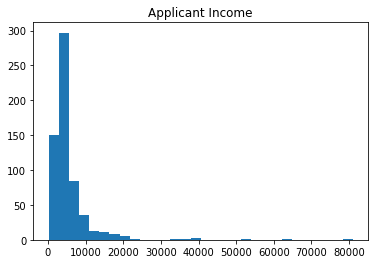

In [7]:
plt.hist(x=df['ApplicantIncome'], bins=30)
plt.title('Applicant Income')
plt.show()


Look at box plots to understand the distributions. 

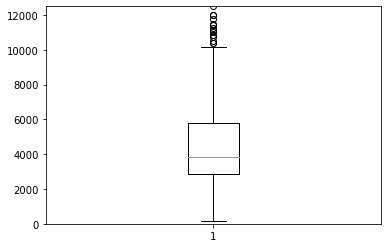

In [8]:
plt.boxplot(x=df['ApplicantIncome'])
plt.ylim(0, 12500)
plt.show()

Look at the distribution of income segregated  by `Education`

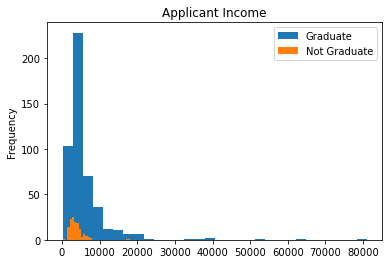

In [9]:
x1 = df.loc[df['Education'] == 'Graduate', 'ApplicantIncome']
x2 = df.loc[df['Education'] == 'Not Graduate', 'ApplicantIncome']

plt.hist(x=x1, bins=30, label='Graduate')
plt.hist(x=x2, bins=30, label='Not Graduate')
plt.title('Applicant Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Look at the histogram and boxplot of LoanAmount

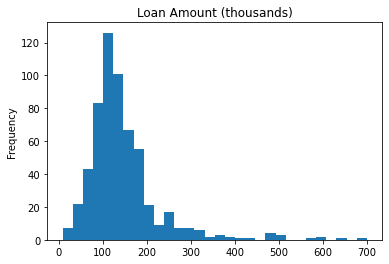

In [10]:
plt.hist(x=df['LoanAmount'], bins=30)
plt.title('Loan Amount (thousands)')
plt.ylabel('Frequency')
plt.show()

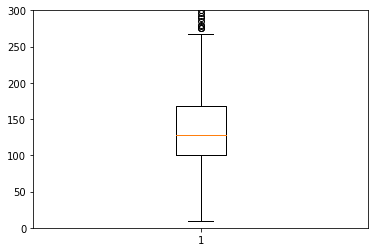

In [11]:
plt.boxplot(x=df[df['LoanAmount'].notnull()]['LoanAmount'])
plt.ylim(0, 300)
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [12]:
# skip

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [13]:
miss_perc = df.isnull().sum() / len(df) * 100

In [14]:
df = df.dropna(axis=0, subset=['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']).reset_index(drop=True)
df.isnull().sum() / len(df) * 100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.718200
Loan_Amount_Term     2.348337
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
df.loc[df['Loan_Amount_Term'].isnull(), 'Loan_Amount_Term'] = np.mean(df['Loan_Amount_Term'])
df.loc[df['LoanAmount'].isnull(), 'LoanAmount'] = np.mean(df['LoanAmount'])

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [16]:
df['LoanAmount'] = np.log(df['LoanAmount'])

Combine both incomes as total income and take a log transformation of the same.

In [17]:
# df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
# df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

total_income = df['ApplicantIncome'] + df['CoapplicantIncome']
df.insert(loc=6, column='TotalIncome', value=total_income)
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

### Categorical Transform

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# transform Gender
df.insert(loc=1, column='Male', value=0)
df.loc[df['Gender'] == 'Male', 'Male'] = 1
df.drop('Gender', axis=1, inplace=True)

In [20]:
# transform Married
df.insert(loc=2, column='Married_1', value=0)
df.loc[df['Married'] == 'Yes', 'Married_1'] = 1
df.drop('Married', axis=1, inplace=True)
df.rename(columns={'Married_1':'Married'}, inplace=True)

In [21]:
# transform Dependents
df.loc[df['Dependents'] == '3+', 'Dependents'] = 4
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [22]:
# transform Education
df.insert(loc=4, column='Graduate', value=0)
df.loc[df['Education'] == 'Graduate', 'Graduate'] = 1
df.drop('Education', axis=1, inplace=True)

In [23]:
# transform Self_Employed
df.insert(loc=5, column='SelfEmployed', value=0)
df.loc[df['Self_Employed'] == 'Yes', 'SelfEmployed'] = 1
df.drop('Self_Employed', axis=1, inplace=True)

In [24]:
# transform Property_Area
codes, uniques = pd.factorize(values=df['Property_Area'], sort=True)
df['Property_Area'] = codes

In [25]:
# transform Loan_Status (target)
df['LoanStatus'] = 0
df.loc[df['Loan_Status'] == 'Y', 'LoanStatus'] = 1
df.drop('Loan_Status', axis=1, inplace=True)

In [26]:
# drop Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)

In [27]:
df

,Male,Married,Dependents,Graduate,SelfEmployed,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanStatus
0,1,0,0,1,0,5849.0,4.970759,360.0,1.0,2,1
1,1,1,1,1,0,6091.0,4.852030,360.0,1.0,0,0
2,1,1,0,1,1,3000.0,4.189655,360.0,1.0,2,1
3,1,1,0,0,0,4941.0,4.787492,360.0,1.0,2,1
4,1,0,0,1,0,6000.0,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
506,0,0,0,1,0,2900.0,4.262680,360.0,1.0,0,1
507,1,1,4,1,0,4106.0,3.688879,180.0,1.0,0,1
508,1,1,1,1,0,8312.0,5.533389,360.0,1.0,2,1
509,1,1,2,1,0,7583.0,5.231109,360.0,1.0,2,1


## 4. Building a Predictive Model

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rfc = RandomForestClassifier()

Try paramater grid search to improve the results

In [29]:
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}

In [30]:
grid = GridSearchCV(estimator=rfc, param_grid=params, verbose=1).fit(X_train, y_train)

print(f'Final score is: {grid.score(X_test, y_test)}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Final score is: 0.7864077669902912


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
# preprocessing pipeline
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary'))
])

# preprocessor = ColumnTransformer([
#     ('na_gender', categorical_transformer, ['Gender']),
#     ('na_married', categorical_transformer, ['Married']),
#     ('na_dependents', categorical_transformer, ['Dependents']),
#     ('na_education', categorical_transformer, ['Education']),
#     ('na_selfEmployed', categorical_transformer, ['Self_Employed']),
#     ('na_applicantIncome', SimpleImputer(strategy='mean'), ['ApplicantIncome']),
#     ('na_coapplicantIncome', SimpleImputer(strategy='mean'), ['CoapplicantIncome']),
#     ('na_loanAmount', SimpleImputer(strategy='mean'), ['LoanAmount']),
#     ('na_loanAmountTerm', SimpleImputer(strategy='mean'), ['Loan_Amount_Term']),
#     ('na_creditHistory', SimpleImputer(strategy='most_frequent'), ['Credit_History']),
#     ('na_propertyArea', categorical_transformer, ['Property_Area']),
#     ('na_loanStatus', categorical_transformer, ['Loan_Status'])
# ])

preprocessor = ColumnTransformer([
    ('cat1', categorical_transformer, slice(1, 6)),
    ('num', SimpleImputer(strategy='mean'), slice(6, 10)),
    ('cat2', SimpleImputer(strategy='most_frequent'), [10]),
    ('cat3', categorical_transformer, slice(10, 13))
])

In [39]:
# model pipeline
rfc = RandomForestClassifier()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rfc', rfc)
])

In [40]:
# grid params
params = {
    'rfc__n_estimators': [50, 100, 150],
    'rfc__max_depth': [3, 4, 5]
}

In [43]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

grid_search = GridSearchCV(estimator=pipeline, param_grid=params, verbose=1).fit(X_train, y_train)

print(f'Final score is: {grid_search.score(X_test, y_test)}')
print(f'Best estimator is: {grid_search.best_estimator_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Final score is: 0.8292682926829268
Best estimator is: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  slice(1, 6, None)),
                                                 ('num', SimpleImputer(),
                                                  slice(6, 10, None)),
                                                 ('cat2',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [10]),
      

In [71]:
import pickle

# save the model to disk
with open('model.sav', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

# load saved model
with open('model.sav', 'rb') as f:
    loaded_model = pickle.load(f)

In [48]:
loaded_model

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat1',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='if_binary'))]),
                                                                         slice(1, 6, None)),
                                                                        ('num',
                                                                         SimpleImputer(),
                                                                         slice(6, 10, None)),
                                              

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

## Testing Connection

#### Local

In [98]:
# testing record
json_data = {
    'Loan_ID': 'LP001003',
    'Gender': 'Male',
    'Married': 'No',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 6100,
    'CoapplicantIncome': 2300,
    'LoanAmount': 120,
    'Loan_Amount_Term': 240,
    'Credit_History': 1,
    'Property_Area': 'Urban'
}

In [99]:
import requests
URL = "http://localhost:5000/predict"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [100]:
print(r.text)

Y


#### Remote (AWS)

In [111]:
# testing record
json_data = {
    'Loan_ID': 'LP001003',
    'Gender': 'Male',
    'Married': 'No',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 6100,
    'CoapplicantIncome': 2300,
    'LoanAmount': 120,
    'Loan_Amount_Term': 240,
    'Credit_History': 0,
    'Property_Area': 'Urban'
}

In [112]:
URL = "http://ec2-18-118-197-131.us-east-2.compute.amazonaws.com:5555/predict"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data)
print(r.text)

N
